In [ ]:
vroi_fn = "/home/ljp238/Desktop/qproj/N10E105__roi.gpkg"
vgrid_fn = "/home/ljp238/Desktop/qproj/N10E105__2o6.gpkg"


- make vfill egm08 

In [7]:
riointerp_fn = "/media/ljp238/12TBWolf/RSPROX/OUTPUT_TILES/DEMVFILL/TILES12/N10E105/N10E105_tdem_DEM__riointerp_si0.tif"
mlinterps_fn = "/media/ljp238/12TBWolf/RSPROX/OUTPUT_TILES/DEMVFILL/TILES12/N10E105/N10E105_tdem_DEM__mlinterpe.tif"
fdem_fn = "/media/ljp238/12TBWolf/RSPROX/OUT_TILES/TILES12/N10E105/N10E105_edem_EGM.tif"
vdem_fn = "/media/ljp238/12TBWolf/RSPROX/OUT_TILES/TILES12/N10E105/N10E105_tdem_DEM__Fw.tif"

In [8]:
# got 4 rasters paths:riointerp_fn, mlinterps_fn,fdem_fn,vdem_fn and vector vgrid_fn
# read the rasters to the bbox of vgrid_fn
# plot 2x2, set vmin, and vmax from np.percentinle(2,80) from the first raster
#make it modular

/tmp/ipykernel_2037122/4152842223.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


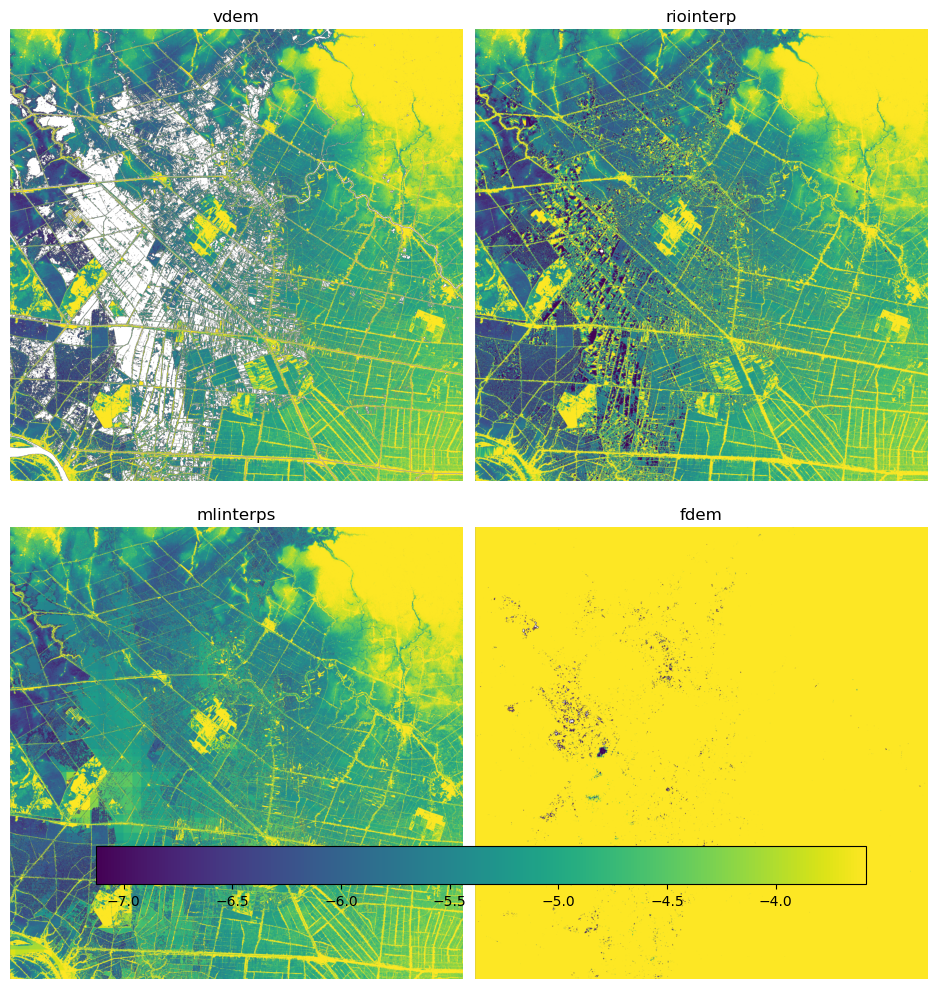

In [10]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.mask import mask

def read_raster_with_bbox(raster_path, bbox):
    """Read a raster file clipped to a bounding box."""
    with rasterio.open(raster_path) as src:
        bbox_geom = [bbox.geometry.iloc[0].__geo_interface__]
        out_image, out_transform = mask(src, bbox_geom, crop=True)
        
        # Set nulls to np.nan 
        out_image = out_image.astype(float)
        out_image[out_image > 1000] = np.nan
        out_image[out_image < -20] = np.nan
        
        return out_image[0], src.meta

def get_percentile_bounds(raster, lower=2, upper=80):
    """Calculate vmin and vmax using percentiles."""
    valid_data = raster[~np.isnan(raster)]
    return np.percentile(valid_data, [lower, upper])

def plot_rasters(raster_paths, bbox_path):
    """Plot 2x2 subplots of raster data clipped to bbox of a vector file."""
    bbox = gpd.read_file(bbox_path).to_crs(epsg=4326)
    rasters = [read_raster_with_bbox(path, bbox)[0] for path in raster_paths]
    
    vmin, vmax = get_percentile_bounds(rasters[0])
    titles = ["vdem", "riointerp", "mlinterps", "fdem"]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for ax, raster, title in zip(axes.flat, rasters, titles):
        img = ax.imshow(raster, cmap='viridis', vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ax.axis('off')
    
    fig.colorbar(img, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
    plt.tight_layout()
    
# Example usage
raster_paths = [vdem_fn, riointerp_fn, mlinterps_fn, fdem_fn]
plot_rasters(raster_paths, vgrid_fn)


In [11]:
#- close up  to show error in the data  could be from QGIS itself 

/tmp/ipykernel_2037122/4152842223.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


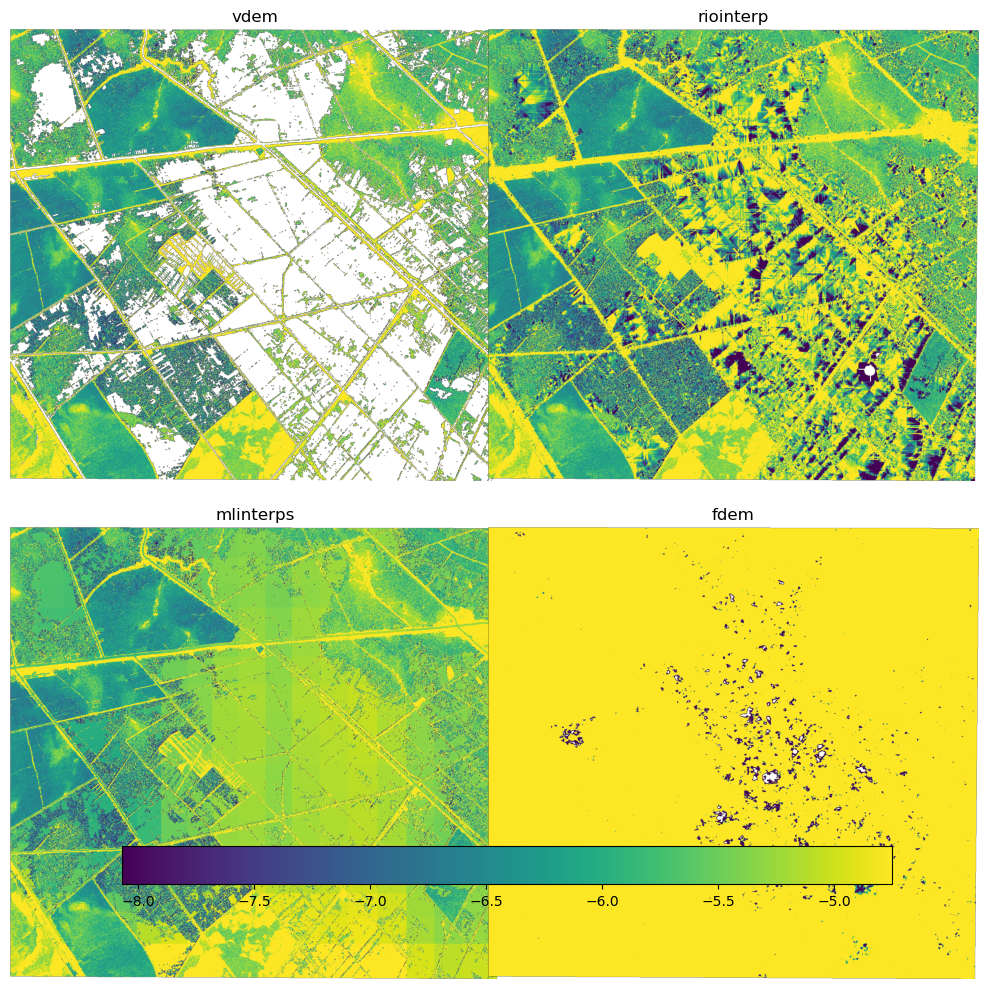

In [12]:
raster_paths = [vdem_fn, riointerp_fn, mlinterps_fn, fdem_fn]
plot_rasters(raster_paths, vroi_fn)

In [13]:
# yes it help plotting this but add qgis shot for emphasis, and remove the scaler bar there
# make the plot more beatufull